In [1]:


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train_f, y_train_f), (X_test_f, y_test_f) = fashion_mnist.load_data()

print(X_train_f.shape, X_test_f.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


In [3]:

X_train_f = X_train_f / 255.0
X_test_f = X_test_f / 255.0


X_train_f = X_train_f.reshape(-1, 28, 28, 1)
X_test_f = X_test_f.reshape(-1, 28, 28, 1)


y_train_f_cat = to_categorical(y_train_f, 10)
y_test_f_cat = to_categorical(y_test_f, 10)


In [4]:
fashion_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

fashion_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

fashion_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history_f = fashion_model.fit(
    X_train_f, y_train_f_cat,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.7077 - loss: 0.7978 - val_accuracy: 0.8644 - val_loss: 0.3739
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.8623 - loss: 0.3837 - val_accuracy: 0.8726 - val_loss: 0.3451
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 55ms/step - accuracy: 0.8799 - loss: 0.3256 - val_accuracy: 0.8916 - val_loss: 0.2913
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 53ms/step - accuracy: 0.8912 - loss: 0.2983 - val_accuracy: 0.8938 - val_loss: 0.2878
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 58ms/step - accuracy: 0.9019 - loss: 0.2663 - val_accuracy: 0.8964 - val_loss: 0.2757
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.9113 - loss: 0.2426 - val_accuracy: 0.9009 - val_loss: 0.2666
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9173 - loss: 0.2273 - val_accuracy: 0.9087 - val_loss: 0.2544
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9212 - loss: 0.2095 - 

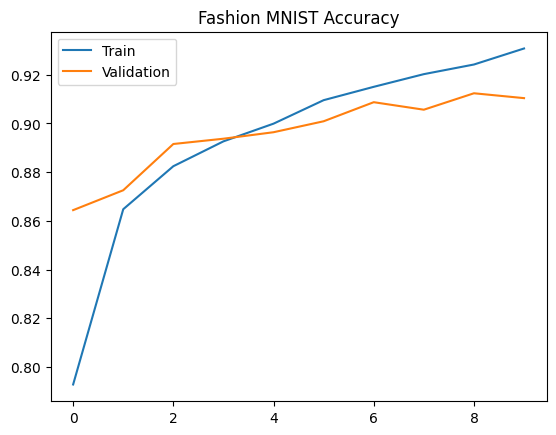

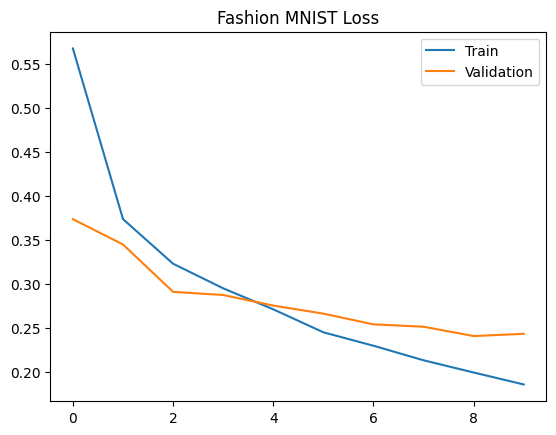

In [6]:
plt.plot(history_f.history['accuracy'])
plt.plot(history_f.history['val_accuracy'])
plt.title("Fashion MNIST Accuracy")
plt.legend(["Train","Validation"])
plt.show()

plt.plot(history_f.history['loss'])
plt.plot(history_f.history['val_loss'])
plt.title("Fashion MNIST Loss")
plt.legend(["Train","Validation"])
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


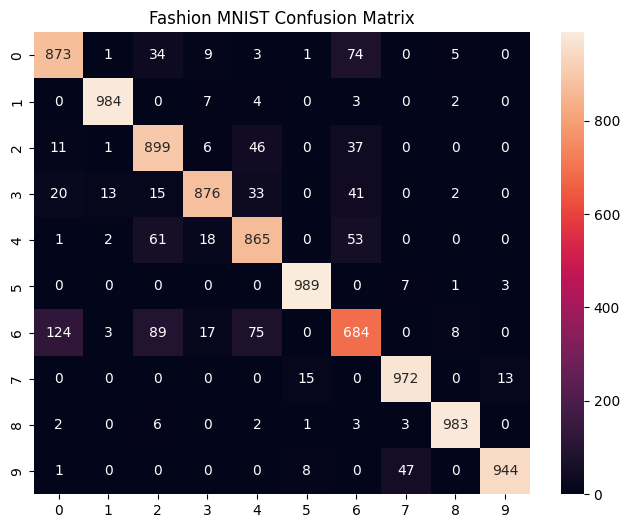

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1000
           1       0.98      0.98      0.98      1000
           2       0.81      0.90      0.85      1000
           3       0.94      0.88      0.91      1000
           4       0.84      0.86      0.85      1000
           5       0.98      0.99      0.98      1000
           6       0.76      0.68      0.72      1000
           7       0.94      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [7]:
y_pred_f = fashion_model.predict(X_test_f)
y_pred_f = np.argmax(y_pred_f, axis=1)

cm_f = confusion_matrix(y_test_f, y_pred_f)

plt.figure(figsize=(8,6))
sns.heatmap(cm_f, annot=True, fmt='d')
plt.title("Fashion MNIST Confusion Matrix")
plt.show()

print(classification_report(y_test_f, y_pred_f))


In [8]:
from tensorflow.keras.datasets import cifar10

(X_train_c, y_train_c), (X_test_c, y_test_c) = cifar10.load_data()

y_train_c = y_train_c.flatten()
y_test_c = y_test_c.flatten()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [9]:
X_train_c = X_train_c / 255.0
X_test_c = X_test_c / 255.0

y_train_c_cat = to_categorical(y_train_c, 10)
y_test_c_cat = to_categorical(y_test_c, 10)


In [10]:
cifar_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])

cifar_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

cifar_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,530 (888.79 KB)

 Trainable params: 227,338 (888.04 KB)

 Non-trainable params: 192 (768.00 B)

In [14]:
history_c = cifar_model.fit(
    X_train_c, y_train_c_cat,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 108s 172ms/step - accuracy: 0.9466 - loss: 0.1507 - val_accuracy: 0.7109 - val_loss: 1.4960
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 113s 126ms/step - accuracy: 0.9449 - loss: 0.1612 - val_accuracy: 0.7276 - val_loss: 1.3596
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 122ms/step - accuracy: 0.9456 - loss: 0.1574 - val_accuracy: 0.7185 - val_loss: 1.3971
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 126ms/step - accuracy: 0.9500 - loss: 0.1449 - val_accuracy: 0.7067 - val_loss: 1.5159
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 122ms/step - accuracy: 0.9511 - loss: 0.1404 - val_accuracy: 0.7279 - val_loss: 1.5038
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 119ms/step - accuracy: 0.9525 - loss: 0.1372 - val_accuracy: 0.7043 - val_loss: 1.5879
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 120ms/step - accuracy: 0.9480 - loss: 0.1525 - val_accuracy: 0.7089 - val_loss: 1.5522
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 118ms/step - accuracy: 0.9517 - loss:

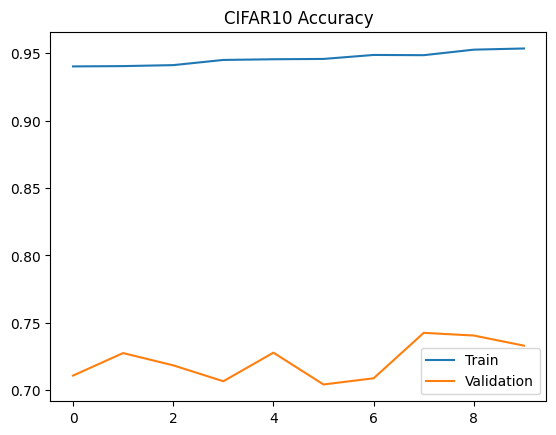

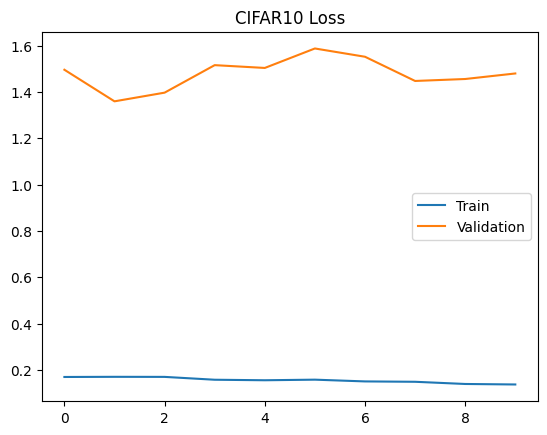

In [16]:
plt.plot(history_c.history['accuracy'])
plt.plot(history_c.history['val_accuracy'])
plt.title("CIFAR10 Accuracy")
plt.legend(["Train","Validation"])
plt.show()

plt.plot(history_c.history['loss'])
plt.plot(history_c.history['val_loss'])
plt.title("CIFAR10 Loss")
plt.legend(["Train","Validation"])
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


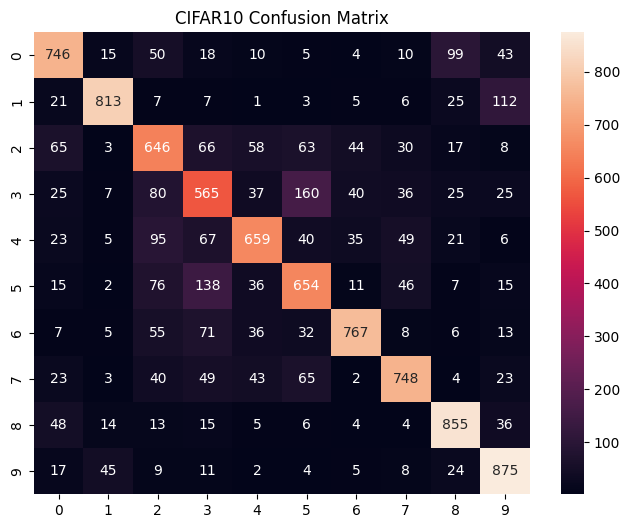

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1000
           1       0.89      0.81      0.85      1000
           2       0.60      0.65      0.62      1000
           3       0.56      0.56      0.56      1000
           4       0.74      0.66      0.70      1000
           5       0.63      0.65      0.64      1000
           6       0.84      0.77      0.80      1000
           7       0.79      0.75      0.77      1000
           8       0.79      0.85      0.82      1000
           9       0.76      0.88      0.81      1000

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.74      0.73      0.73     10000



In [17]:
y_pred_c = cifar_model.predict(X_test_c)
y_pred_c = np.argmax(y_pred_c, axis=1)

cm_c = confusion_matrix(y_test_c, y_pred_c)

plt.figure(figsize=(8,6))
sns.heatmap(cm_c, annot=True, fmt='d')
plt.title("CIFAR10 Confusion Matrix")
plt.show()

print(classification_report(y_test_c, y_pred_c))
